# **Unsupervised Learning Techniques**

 Although most of the applications of machine learning today are based on
 supervised learning (and as a result, this is where most of the investments
 go to), the vast majority of the available data is unlabeled: we have the
 input features **X**, but we do not have the labels **y**. The computer scientist
 Yann LeCun famously said that “if intelligence was a cake, unsupervised
 learning would be the cake, supervised learning would be the icing on the
 cake, and reinforcement learning would be the cherry on the cake.” In other
 words, there is a huge potential in unsupervised learning that we have only
 barely started to sink our teeth into.

 Say you want to create a system that will take a few pictures of each item
 on a manufacturing production line and detect which items are defective.
 You can fairly easily create a system that will take pictures automatically,
 and this might give you thousands of pictures every day. You can then build
 a reasonably large dataset in just a few weeks. But wait, there are no labels!
 If you want to train a regular binary classifier that will predict whether an
 item is defective or not, you will need to label every single picture as
 “defective” or “normal”. This will generally require human experts to sit
 down and manually go through all the pictures. This is a long, costly, and
 tedious task, so it will usually only be done on a small subset of the
 available pictures. As a result, the labeled dataset will be quite small, and
 the classifier’s performance will be disappointing. Moreover, every time the
 company makes any change to its products, the whole process will need to
 be started over from scratch. Wouldn’t it be great if the algorithm could just
 exploit the unlabeled data without needing humans to label every picture?
 Enter unsupervised learning.

In ***Chapter 8*** we looked at the most common unsupervised learning task:
 dimensionality reduction. In this chapter we will look at a few more
unsupervised tasks:
- ***Clustering***
The goal is to group similar instances together into clusters. Clustering
is a great tool for data analysis, customer segmentation, recommender
systems, search engines, image segmentation, semi-supervised learning,
dimensionality reduction, and more.
 
- ***Anomaly detection (also called outlier detection)***
The objective is to learn what “normal” data looks like, and then use
that to detect abnormal instances. These instances are called ***anomalies***,
or ***outliers***, while the normal instances are called ***inliers.***Anomaly
detection is useful in a wide variety of applications, such as fraud
detection, detecting defective products in manufacturing, identifying
new trends in time series, or removing outliers from a dataset before
training another model, which can significantly improve the
performance of the resulting model.
- ***Density estimation***
This is the task of etimating the ***Probability density function*** **(PDF)** of the random process that generated the dataset. Density estimation is commonly used for anomaly detection: instances located in very low regions are likely to be anomalies. It is also useful for data analysis and visualization.


 Ready for some cake? We will start with two clustering algorithms, k-means
 and **DBSCAN**, then we’ll discuss Gaussian mixture models and see how
 they can be used for density estimation, clustering, and anomaly detection.


## **Clustering Algorithims: K-means and DBSCAN**

 As you enjoy a hike in the mountains, you stumble upon a plant you have
 never seen before. You look around and you notice a few more. They are
 not identical, yet they are sufficiently similar for you to know that they most
 likely belong to the same species (or at least the same genus). You may
 need a botanist to tell you what species that is, but you certainly don’t need
 an expert to identify groups of similar-looking objects. This is called
 ***clustering***: it is the task of identifying similar instances and assigning them
 to ***clusters***, or groups of similar instances.

Clustering is used in a wide variety of applications, including:
- ***Customer segmentation***
 You can cluster your customers based on their purchases and their
 activity on your website. This is useful to understand who your
 customers are and what they need, so you can adapt your products and
 marketing campaigns to each segment. For example, customer
 segmentation can be useful in recommender systems to suggest content
 that other users in the same cluster enjoyed.

- ***Data analysis***
 When you analyze a new dataset, it can be helpful to run a clusteringalgorithm, and then analyze each cluster separately.

- ***Dimensionality reduction***
   Once a dataset has been clustered, it is usually possible to measure each
 instance’s ***affinity*** with each cluster; ***affinity*** is any measure of how well an instance fits into a cluster. Each instance’s feature vector x can then
 be replaced with the vector of its cluster affinities. If there are k clusters,
 then this vector is k-dimensional. The new vector is typically much
 lower-dimensional than the original feature vector, but it can preserve
 enough information for further processing.

- ***Feature engineering***
 The cluster affinities can often be useful as extra features. For example,
 we used k-means in Chapter 2 to add geographic cluster affinity features
 to the California housing dataset, and they helped us get better
 performance.

- ***Anomaly detection (also called outlier detection)***
   Any instance that has a low affinity to all the clusters is likely to be an
 anomaly. For example, if you have clustered the users of your website
 based on their behavior, you can detect users with unusual behavior,
 such as an unusual number of requests per second.

- ***Semi-supervised learning***
 If you only have a few labels, you could perform clustering and
 propagate the labels to all the instances in the same cluster. This
 technique can greatly increase the number of labels available for a
 subsequent supervised learning algorithm, and thus improve its
 performance.

- ***Search engines***
 Some search engines let you search for images that are similar to a
 reference image. To build such a system, you would first apply a
 clustering algorithm to all the images in your database; similar images
 would end up in the same cluster. Then when a user provides a reference
 image, all you’d need to do is use the trained clustering model to find
 this image’s cluster, and you could then simply return all the images
 from this cluster.

- ***Image segmentation***
 By clustering pixels according to their color, then replacing each pixel’s
 color with the mean color of its cluster, it is possible to considerably
 reduce the number of different colors in an image. Image segmentation
 is used in many object detection and tracking systems, as it makes it
 easier to detect the contour of each object.


There is no universal definition of what a cluster is: it really depends on the
 context, and different algorithms will capture different kinds of clusters.
 Some algorithms look for instances centered around a particular point,
 called a centroid. Others look for continuous regions of densely packed
 instances: these clusters can take on any shape. Some algorithms are
 hierarchical, looking for clusters of clusters. And the list goes on.

 In this section, we will look at two popular clustering algorithms, k-means
 and DBSCAN, and explore some of their applications, such as nonlinear
 dimensionality reduction, semi-supervised learning, and anomaly detection.

### **K-means**

 Consider a simple unlabeled dataset with certain number of clusters. The k-means algorithm is a simple algorithm
 capable of clustering this kind of dataset very quickly and efficiently, often
 in just a few iterations. It was proposed by Stuart Lloyd at Bell Labs in
 1957 as a technique for pulse-code modulation, but it was only published
 outside of the company in 1982.  In 1965, Edward W. Forgy had published
 virtually the same algorithm, so k-means is sometimes referred to as the
 Lloyd–Forgy algorithm.

Let’s train a k-means clusterer on this dataset. It will try to find each blob’s
 center and assign each instance to the closest blob:

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.datasets import make_blobs

x, y= make_blobs(n_samples=10_000, centers=5, random_state=50)
df = pd.DataFrame(x, columns=['feature 1', 'feature 2'])
df['target'] = y

k = 5
kmeans = KMeans(n_clusters=k, random_state=50)
y_pred = kmeans.fit_predict(x)
print(y_pred)
print(y)

[2 3 0 ... 1 1 3]
[0 4 1 ... 3 2 4]


 Note that you have to specify the number of clusters k that the algorithm
 must find. In this example, it is pretty obvious from looking at the data that
 k should be set to 5, but in general it is not that easy. We will discuss this
 shortly.

 Each instance will be assigned to one of the five clusters. In the context of
 clustering, an instance’s label is the index of the cluster to which the
 algorithm assigns this instance; this is not to be confused with the class
 labels in classification, which are used as targets (remember that clustering
 is an unsupervised learning task). The KMeans instance preserves the
 predicted labels of the instances it was trained on, available via the
 labels_ instance variable:

In [2]:
y_pred is kmeans.labels_

True

 We can also take a look at the five centroids that the algorithm found:

In [3]:
kmeans.cluster_centers_

array([[-4.87602217, -2.04582454],
       [-2.47723995,  9.92851685],
       [-0.09800377, -5.42854806],
       [ 5.21172561, -3.76719803],
       [-1.83041748,  5.45659125]])

You can easily assign new instances to the cluster whose centroid is closest:

In [4]:
import numpy as np

x_new = np.array([[-3, -2], [-2, 4], [4, -2], [0, -4], [-5, 9]])
kmeans.predict(x_new)

array([0, 4, 3, 2, 1])

 The vast majority of the instances were clearly assigned to the appropriate
 cluster, but a few instances were probably mislabeled, especially near the
 boundary between the top-left cluster and the central cluster. Indeed, the k
means algorithm does not behave very well when the blobs have very
 different diameters because all it cares about when assigning an instance to
 a cluster is the distance to the centroid.
 

Instead of assigning each instance to a single cluster, which is called ***hard clustering***, it can be useful to give each instance a score per cluster, which is
 called ***soft clustering***. The score can be the distance between the instance
 and the centroid or a similarity score (or affinity), such as the Gaussian
 radial basis function we used in Chapter 2. In the KMeans class, the
***transform()*** method measures the distance from each instance to every
 centroid:

In [5]:
kmeans.transform(x_new).round(2)

array([[ 1.88, 11.94,  4.49,  8.4 ,  7.55],
       [ 6.7 ,  5.95,  9.62, 10.6 ,  1.47],
       [ 8.88, 13.57,  5.34,  2.14,  9.47],
       [ 5.25, 14.15,  1.43,  5.22,  9.63],
       [11.05,  2.69, 15.24, 16.35,  4.75]])

In this example, the first instance in x_new is located at a distance of about 1.88 from the first centroid, 11.94 from the second centroid, 4.49 from the third centroid, 8.4 from the fourth centroid, and 7.55 from the fifth(last) centroid. If you have a high-dimensional datase Altenatively you can use these distances as extra features to train another model.

### ***K-means algorithm***

 So, how does the algorithm work? Well, suppose you were given the
 centroids. You could easily label all the instances in the dataset by assigning
 each of them to the cluster whose centroid is closest. Conversely, if you
 were given all the instance labels, you could easily locate each cluster’s
 centroid by computing the mean of the instances in that cluster. But you are
 given neither the labels nor the centroids, so how can you proceed? Start by
 placing the centroids randomly (e.g., by picking k instances at random from
 the dataset and using their locations as centroids). Then label the instances,
 update the centroids, label the instances, update the centroids, and so on
 until the centroids stop moving. The algorithm is guaranteed to converge in
 a finite number of steps (usually quite small). That’s because the mean
 squared distance between the instances and their closest centroids can only
 go down at each step, and since it cannot be negative, it’s guaranteed to
 converge.

> #### ***NOTE:***
>  The computational complexity of the algorithm is generally linear with regard to the
 number of instances m, the number of clusters k, and the number of dimensions n.
 However, this is only true when the data has a clustering structure. If it does not, then in
 the worst-case scenario the complexity can increase exponentially with the number of
 instances. In practice, this rarely happens, and k-means is generally one of the fastest
 clustering algorithms.

Although the algorithm is guaranteed to converge, it may not converge to
 the right solution (i.e., it may converge to a local optimum): whether it does
 or not depends on the centroid initialization. That is, to other suboptimal solutions that the algorithm can converge to if you are not lucky
 with the random initialization step. Let’s take a look at a few ways you can mitigate this risk by improving the
 centroid initialization.

### ***Centroid initialization methods***

 If you happen to know approximately where the centroids should be (e.g., if
 you ran another clustering algorithm earlier), then you can set the ***init***
 hyperparameter to a NumPy array containing the list of centroids, and set
 ***n_init*** to ***1***:

In [6]:
good_init = np.array([[-5, -2], [-2,  10], [0, -5], [ 5, -4], [-2,  5]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=50)
kmeans.fit(x)

KMeans(init=array([[-5, -2],
       [-2, 10],
       [ 0, -5],
       [ 5, -4],
       [-2,  5]]),
       n_clusters=5, n_init=1, random_state=50)

In [7]:
kmeans.cluster_centers_

array([[-4.87602217, -2.04582454],
       [-2.47589223,  9.92642426],
       [-0.09800377, -5.42854806],
       [ 5.21172561, -3.76719803],
       [-1.83112867,  5.45421046]])

 Another solution is to run the algorithm multiple times with different
 random initializations and keep the best solution. The number of random
 initializations is controlled by the n_init hyperparameter: by default it is
 equal to 10, which means that the whole algorithm described earlier runs
 10 times when you call fit(), and Scikit-Learn keeps the best solution.
 But how exactly does it know which solution is the best?

It uses a
performance metric! That metric is called the model’s inertia, which is the
 sum of the squared distances between the instances and their closest
 centroids. If you are curious, a model’s inertia is
 accessible via the inertia_ instance variable: Let's take a look

In [8]:
kmeans.inertia_

19616.84991486182

The score() method returns the negative inertia (it’s negative because a
 predictor’s score() method must always respect Scikit-Learn’s “greater
 is better” rule: if a predictor is better than another, its score() method
 should return a greater score):

In [9]:
kmeans.score(x)

-19616.84991486182

An important improvement to the k-means algorithm, k-means++, was
 proposed in a 2006 paper by David Arthur and Sergei Vassilvitskii.  They
 introduced a smarter initialization step that tends to select centroids that are
 distant from one another, and this improvement makes the k-means
 algorithm much less likely to converge to a suboptimal solution. The paper
 showed that the additional computation required for the smarter
 initialization step is well worth it because it makes it possible to drastically
 reduce the number of times the algorithm needs to be run to find the
 optimal solution. The k-means++ initialization algorithm works like this:
1. Take one centroid **C**<sup>(1)</sup>, chosen uniformly at randomfrom the dataset.
   
2. Take a new centroid **C**<sup>(i)</sup>, choosing an instance **X**<sup>(i)</sup> with probability ***D(X<sup>(i)</sup>)<sup>2</sup> / ∑<sup>m</sup><sub>j=1</sub>D(X<sup>(j)</sup>)<sup>2</sup>***, where ***D(X<sup>(i)</sup>)*** is the distance between the instance ***X<sup>(i)</sup> and the closest centroid that already chosen. This probability distribution insures that instances farther away from already chosen centroids are much likely to be selected as centroids.
3. Repeat the previous step until all ***k*** centroids have been chosen.
   

The ***KMeans*** class uses this initialization method by default.

### ***Accelerated k-means and mini-batch k-means***

Another improvement to the k-means algorithm was proposed in a 2003
paper by Charles Elkan.  On some large datasets with many clusters, the
algorithm can be accelerated by avoiding many unnecessary distance
calculations. Elkan achieved this by exploiting the triangle inequality (i.e.,
that a straight line is always the shortest distance between two points ) and
by keeping track of lower and upper bounds for distances between instances
and centroids. However, Elkan’s algorithm does not always accelerate
training, and sometimes it can even slow down training significantly; it
depends on the dataset. Still, if you want to give it a try, set
***algorithm="elkan"***.

Yet another important variant of the k-means algorithm was proposed in a
 2010 paper by David Sculley.  Instead of using the full dataset at each
 iteration, the algorithm is capable of using mini-batches, moving the
 centroids just slightly at each iteration. This speeds up the algorithm
 (typically by a factor of three to four) and makes it possible to cluster huge
 datasets that do not fit in memory. Scikit-Learn implements this algorithm
 in the ***MiniBatchKMeans*** class, which you can use just like the KMeans
 class:

In [10]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=50)
minibatch_kmeans.fit(x)

MiniBatchKMeans(n_clusters=5, random_state=50)

 If the dataset does not fit in memory, the simplest option is to use the
 memmap class, as we did for incremental PCA in Chapter 8. Alternatively,
you can pass one mini-batch at a time to the partial_fit() method,
 but this will require much more work, since you will need to perform
 multiple initializations and select the best one yourself.

 Although the mini-batch k-means algorithm is much faster than the regular
 k-means algorithm, its inertia is generally slightly worse. You can see this in
 Figure 9-6: the plot on the left compares the inertias of mini-batch k-means
 and regular k-means models trained on the previous five-blobs dataset using
 various numbers of clusters k. The difference between the two curves is
 small, but visible. In the plot on the right, you can see that mini-batch k
means is roughly 3.5 times faster than regular k-means on this dataset.

> #### ***Consider the figure from the book...***

### ***Finding the optimal number of clusters***

 So far, we’ve set the number of clusters k to 5 because it was obvious by
 looking at the data that this was the correct number of clusters. But in
 general, it won’t be so easy to know how to set k, and the result might be
 quite bad if you set it to the wrong value.
> ***Consider Figure 9-7, From the book...***


You might be thinking that you could just pick the model with the lowest
inertia. Unfortunately, it is not that simple. The inertia for k=3 is about
653.2, which is much higher than for k=5 (211.6). But with k=8, the inertia
is just 119.1. The inertia is not a good performance metric when trying to
choose k because it keeps getting lower as we increase k. Indeed, the more
clusters there are, the closer each instance will be to its closest centroid, and
therefore the lower the inertia will be. Let’s plot the inertia as a function of
k. When we do this, the curve often contains an inflexion point called the
elbow 

 As you can see, the inertia drops very quickly as we increase k up to 4, but
 then it decreases much more slowly as we keep increasing k. This curve has
 roughly the shape of an arm, and there is an elbow at k = 4. So, if we did
 not know better, we might think 4 was a good choice: any lower value
 would be dramatic, while any higher value would not help much, and we
 might just be splitting perfectly good clusters in half for no good reason.
 > ***Consider Figure 9-8, from the book...***

 This technique for choosing the best value for the number of clusters is
 rather coarse. A more precise (but also more computationally expensive)
approach is to use the ***silhouette score***, which is the mean ***silhouette***
 coefficient over all the instances. An instance’s silhouette coefficient is
 equal to (b – a) / max(a, b), where a is the mean distance to the other
 instances in the same cluster (i.e., the mean intra-cluster distance) and b is
 the mean nearest-cluster distance (i.e., the mean distance to the instances of
 the next closest cluster, defined as the one that minimizes b, excluding the
 instance’s own cluster). The silhouette coefficient can vary between –1 and
 +1. A coefficient close to +1 means that the instance is well inside its own
 cluster and far from other clusters, while a coefficient close to 0 means that
 it is close to a cluster boundary; finally, a coefficient close to –1 means that
 the instance may have been assigned to the wrong cluster.

 To compute the silhouette score, you can use Scikit-Learn’s
 silhouette_score() function, giving it all the instances in the dataset
 and the labels they were assigned:

In [11]:
from sklearn.metrics import silhouette_score
silhouette_score(x, kmeans.labels_)

0.6509986066259916

Let’s compare the silhouette scores for different numbers of clusters, 
> Consider figure from the book

 An even more informative visualization is obtained when we plot every
 instance’s silhouette coefficient, sorted by the clusters they are assigned to
 and by the value of the coefficient. This is called a ***silhouette diagram***

### **Limits of k-means**

 Despite its many merits, most notably being fast and scalable, k-means is
 not perfect. As we saw, it is necessary to run the algorithm several times to
 avoid suboptimal solutions, plus you need to specify the number of clusters,
 which can be quite a hassle. Moreover, k-means does not behave very well
 when the clusters have varying sizes, different densities, or nonspherical
 shapes.

> #### ***TIP:*** 
> It is important to scale the input features (see Chapter 2) before you run k-means, or the
 clusters may be very stretched and k-means will perform poorly. Scaling the features
 does not guarantee that all the clusters will be nice and spherical, but it generally helps
 k-means.

 Now let’s look at a few ways we can benefit from clustering. We will use k
means, but feel free to experiment with other clustering algorithms.

### **Using Clustering for Image Selection**

***Image segmentation*** is the task of partitioning an image into multiple segments. There are several variants:
- In ***Color segmentation***, pixels with a similar color get assigned to the
 same segment. This is sufficient in many applications. For example, if
 you want to analyze satellite images to measure how much total forest
 area there is in a region, color segmentation may be just fine.

- In ***Semantic segmentation***, all pixels that are part of the same object
 type get assigned to the same segment. For example, in a self-driving
car’s vision system, all pixels that are part of a pedestrian’s image
 might be assigned to the “pedestrian” segment (there would be one
 segment containing all the pedestrians).

- In ***Instancw segmentation***, all pixels that are part of the same individual
 object are assigned to the same segment. In this case there would be a
 different segment for each pedestrian.

 The state of the art in semantic or instance segmentation today is achieved
 using complex architectures based on convolutional neural networks (see
 Chapter 14). In this chapter we are going to focus on the (much simpler)
 color segmentation task, using k-means.

 We’ll start by importing the Pillow package (successor to the Python
 Imaging Library, PIL), which we’ll then use to load the ladybug.png image
 (see the upper-left image in Figure 9-12), assuming it’s located at
 ***filepath:***

In [12]:
import PIL
filepath = "C:/Users/jacks/Pictures/Screenshots/Screenshot 2024-12-08 093009 (2).png"
image = np.asarray(PIL.Image.open(filepath))
image.shape

AttributeError: module 'PIL' has no attribute 'Image'

 The following code reshapes the array to get a long list of RGB colors, then
 it clusters these colors using k-means with eight clusters. It creates a
 segmented_img array containing the nearest cluster center for each pixel
 (i.e., the mean color of each pixel’s cluster), and lastly it reshapes this array
to the original image shape. The third line uses advanced NumPy indexing;
 for example, if the first 10 labels in kmeans_.labels_ are equal to 1,
 then the first 10 colors in segmented_img are equal to
 kmeans.cluster_centers_[1]:

In [ ]:
x = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=50).fit(x)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

NameError: name 'image' is not defined

 This outputs the image shown in the upper right of Figure.  You can
 experiment with various numbers of clusters, as shown in the figure. When
 you use fewer than eight clusters, notice that the ladybug’s flashy red color
 fails to get a cluster of its own: it gets merged with colors from the
 environment. This is because k-means prefers clusters of similar sizes. The
 ladybug is small—much smaller than the rest of the image—so even though
 its color is flashy, k-means fails to dedicate a cluster to it.

### **Using Clustering for Semi-Supervised Learning**

 Another use case for clustering is in semi-supervised learning, when we
 have plenty of unlabeled instances and very few labeled instances. In this
 section, we’ll use the digits dataset, which is a simple MNIST-like dataset
 containing 1,797 grayscale 8 × 8 images representing the digits 0 to 9. First,
 let’s load and split the dataset (it’s already shuffled):

In [13]:
from sklearn.datasets import load_digits

x_digits, y_digits = load_digits(return_X_y=True)
x_train, y_train = x_digits[:1400], y_digits[:1400]
x_test, y_test = x_digits[1400:], y_digits[1400:]

 We will pretend we only have labels for 50 instances. To get a baseline
 performance, let’s train a logistic regression model on these 50 labeled
 instances:

In [14]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000, random_state=50)
log_reg.fit(x_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000, random_state=50)

We can then measure the accuracy of this model on the test set (note that
 the test set must be labeled):

In [15]:
log_reg.score(x_test, y_test)

0.7581863979848866

The model's accuracy is just 75.8%. That's not great: indeed, if you try training the model on the full training set, you will find that it will reach about 90.7% accuracy. Let's see how we can do better. First, let'e cluster the training set into 50 clusters. Then, for each cluster, we'll find the image closest to the centroid. We'll call these images the ***representatives images***

In [16]:
k = 50

kmeans = KMeans(n_clusters=k, random_state=42)
x_digits_dist = kmeans.fit_transform(x_train)
representative_digit_idx = np.argmin(x_digits_dist, axis=0)
x_representative_digits = x_train[representative_digit_idx]

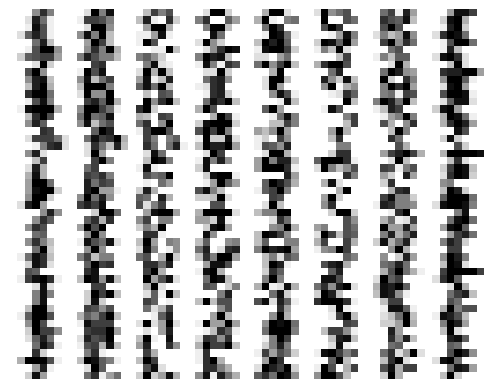

In [17]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data
    plt.imshow(image, cmap='binary')
    plt.axis("off")
    
some_image = x_representative_digits
plot_digit(some_image)
plt.show()

 Let’s look at each image and manually label them:

In [18]:
y_representative_digits = np.array([1, 3, 6, 0, 7, 9, 2, 4, 8, 9, 5, 4, 7, 1, 2, 6, 1, 2, 5, 1, 4, 1, 3, 3, 8, 8, 2, 5, 6, 9, 1, 4, 0, 6, 8, 3, 4, 6, 7, 2, 4, 1, 0, 7, 5, 
1, 9, 9, 3, 7])

In [19]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(x_representative_digits, y_representative_digits)
log_reg.score(x_test, y_test)

0.16624685138539042

But perhaps we can go one step further: what if we propagated the labels to
 all the other instances in the same cluster? This is called ***label propagation:***

In [20]:
y_train_propagated = np.empty(len(x_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

 Now let’s train the model again and look at its performance:

In [21]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train_propagated)
log_reg.score(x_test, y_test)

d:\CONTENTS\APPLICATIONS\New Folder\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.1309823677581864

The accuracy is generally very poor Let's Try this, The following code first
 computes the distance from each instance to its closest cluster center, then
 for each cluster it sets the 1% largest distances to –1. Lastly, it creates a set
 without these instances marked with a –1 distance:

In [22]:
percentile_closest = 99

x_cluster_dist = x_digits_dist[np.arange(len(x_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = x_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (x_cluster_dist > cutoff_distance)
    x_cluster_dist[in_cluster & above_cutoff] = -1
    
partially_propagated = (x_cluster_dist != -1)
x_train_partially_propagated = x_train[partially_propagated]
y_train_partially_propagated = y_train[partially_propagated]

 Now let’s train the model again on this partially propagated dataset and see
 what accuracy we get:

In [23]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(x_train_partially_propagated, y_train_partially_propagated)
log_reg.score(x_test, y_test)

0.9118387909319899

Nice! With just 50 labeled instances (only 5 examples per class on
 average!) we got 91.2% accuracy, Let's see on full dataset performance.

In [24]:
log_reg = LogisticRegression(max_iter=10_000, random_state=50)
log_reg.fit(x_train, y_train)
log_reg.score(x_test, y_test)

0.9093198992443325

Almost lower by 0.3% accuracy to the performance on modified kmeans algorothim this is quite amaizing.This is
 partly thanks to the fact that we dropped some outliers, and partly because
 the propagated labels are actually pretty good—their accuracy is about
 100%, as the following code shows:
 It's Quite fascinating hahahh,

In [25]:
(y_train_partially_propagated == y_train[partially_propagated]).mean()

1.0

In [26]:
# I was trying to plot new figurespropagated. After some modifications
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data
    plt.imshow(image, cmap='binary')
    plt.axis("off")
    
some_image = x_train_partially_propagated[[11]]
plot_digit(some_image)
plt.show()

> #### ***TIP:***
>  Scikit-Learn also offers two classes that can propagate labels automatically:
 LabelSpreading and LabelPropagation in the
 sklearn.semi_supervised package. Both classes construct a similarity matrix
 between all the instances, and iteratively propagate labels from labeled instances to
 similar unlabeled instances. There’s also a very different class called
 SelfTrainingClassifier in the same package: you give it a base classifier (such
 as a RandomForestClassifier) and it trains it on the labeled instances, then uses
 it to predict labels for the unlabeled samples. It then updates the training set with the
 labels it is most confident about, and repeats this process of training and labeling until it
 cannot add labels anymore. These techniques are not magic bullets, but they can
 occasionally give your model a little boost.


> ### **ACTIVE LEARNING**
>  To continue improving your model and your training set, the next step
 could be to do a few rounds of ***active learning***, which is when a human
 expert interacts with the learning algorithm, providing labels for
 specific instances when the algorithm requests them. There are many
 different strategies for active learning, but one of the most common
 ones is called ***uncertainty sampling***. Here is how it works:
>1. The model is trained on the labeled instances gathered so far, and
 this model is used to make predictions on all the unlabeled
 instances.
>2. The instances for which the model is most uncertain (i.e., where its
 estimated probability is lowest) are given to the expert for labeling.
>3. You iterate this process until the performance improvement stops
 being worth the labeling effort.
 
> Other active learning strategies include labeling the instances that
 would result in the largest model change or the largest drop in the
 model’s validation error, or the instances that different models disagree
 on (e.g., an SVM and a random forest).

Before we move on to Gaussian mixture models, let’s take a look at
 DBSCAN, another popular clustering algorithm that illustrates a very
 different approach based on local density estimation. This approach allows
 the algorithm to identify clusters of arbitrary shapes.

### **DBSCAN**

The ***density-based spatial clustering of applications with noise*** **(DBSCAN)** algorithm defines clusters as continuous regions of high density. Here is how it works:
- For each instance, the algorithm counts how many instances are
 located within a small distance ε (epsilon) from it. This region is called
 the instance’s ε-neighborhood.

-  If an instance has at least min_samples instances in its ε
neighborhood (including itself), then it is considered a core instance.
 In other words, core instances are those that are located in dense
 regions.

- All instances in the neighborhood of a core instance belong to the
 same cluster. This neighborhood may include other core instances;
 therefore, a long sequence of neighboring core instances forms a single
 cluster.

- Any instance that is not a core instance and does not have one in its
 neighborhood is considered an anomaly.

 This algorithm works well if all the clusters are well separated by low
density regions. The DBSCAN class in Scikit-Learn is as simple to use as
 you might expect. Let’s test it on the moons dataset, introduced in
 Chapter 5:

In [27]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

x,  y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(x, y)

DBSCAN(eps=0.05)

 The labels of all the instances are now available in the ***labels_*** instance
 variable:

In [28]:
dbscan.labels_

array([ 0,  1, -1,  2,  3,  0,  0,  1,  1,  1,  1, -1,  1,  6,  4,  0,  0,
        7,  2,  2,  5,  0, -1,  0,  6,  7,  8, 12,  9, 11,  9,  0,  5,  0,
        0,  1, 10,  7,  9, 10,  0, -1,  5,  0, 11, 12,  0,  5,  2, 13,  1,
        0,  1,  7,  0,  3,  4,  5, -1, -1,  0,  8,  1,  3, 12,  3,  3,  4,
        6,  2,  2, -1,  8,  2, -1,  0,  2, 12,  0,  0,  7,  5, -1,  0,  6,
        0,  5,  1, 12,  5, 13,  7,  2,  6, 13, -1,  0,  1,  5,  5,  5,  2,
       -1, 12,  9, 14,  7,  0,  3,  3,  5,  3,  0,  0, -1,  0, 13,  2,  0,
        2,  5,  1, -1,  7,  7, -1,  1,  5,  3, -1,  9, 12, 12, 12,  1, 13,
       -1,  2,  0, 12,  2,  7, 12, 12, -1,  1,  0, 12,  2,  5, 14,  1,  0,
        9, -1, -1,  3, 11,  8,  0,  2,  1,  2,  8,  0,  0,  7,  2,  1,  0,
       12,  7,  1,  0,  5, -1,  5,  5,  6,  0,  2, 13,  2,  7, 10,  5,  5,
        1,  2,  0,  1, -1,  1,  7,  1,  7,  5,  0,  1,  5,  5,  6, 13,  1,
        8,  2, 13, -1, 13,  7,  7,  0,  3,  5, -1,  0,  0, -1,  1, 13,  3,
       14,  0, 11, -1,  2

 Notice that some instances have a cluster index equal to –1, which means
 that they are considered as anomalies by the algorithm. The indices of the
core instances are available in the ***core_sample_indices_ instance***
 variable, and the core instances themselves are available in the
 ***components_*** instance variable:

In [29]:
dbscan.core_sample_indices_

array([  0,   1,   3,   4,   5,   6,   7,   8,   9,  10,  12,  14,  15,
        16,  18,  20,  21,  23,  24,  25,  26,  28,  30,  31,  32,  34,
        35,  36,  37,  38,  39,  40,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  55,  56,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  70,  72,  73,  75,  76,  77,  79,  84,  85,  86,
        87,  88,  90,  91,  92,  93,  94,  96,  97,  98,  99, 101, 103,
       105, 106, 107, 108, 109, 111, 112, 113, 116, 117, 118, 121, 123,
       124, 126, 127, 128, 130, 131, 132, 133, 134, 135, 137, 138, 139,
       140, 141, 142, 143, 145, 150, 151, 152, 153, 156, 158, 159, 161,
       162, 164, 165, 166, 168, 169, 170, 171, 172, 174, 176, 177, 178,
       179, 182, 183, 184, 185, 186, 187, 188, 189, 190, 192, 193, 194,
       195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 208, 209,
       210, 211, 212, 213, 216, 218, 219, 220, 221, 223, 225, 227, 228,
       229, 230, 232, 233, 234, 235, 236, 239, 240, 243, 247, 24

In [30]:
instances = dbscan.components_
instances

array([[-0.86265461,  0.51159869],
       [ 0.15696791,  1.02210037],
       [ 0.60582602, -0.37419548],
       ...,
       [ 1.65698342, -0.23194611],
       [ 1.60624428, -0.32803234],
       [ 0.19340112, -0.04419423]])

 Surprisingly, the **DBSCAN** class does not have a ***predict()*** method,
 although it has a ***fit_predict()*** method. In other words, it cannot
 predict which cluster a new instance belongs to. This decision was made
 because different classification algorithms can be better for different tasks,
 so the authors decided to let the user choose which one to use. Moreover,
 it’s not hard to implement. For example, let’s train a
 ***KNeighborsClassifier***:


In [31]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

Now, given a few new instances, we can predict which clusters they most
 likely belong to and even estimate a probability for each cluster:

In [32]:
x_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
print(knn.predict(x_new))
knn.predict_proba(x_new)

[ 7 13 12  6]


array([[0.  , 0.  , 0.04, 0.  , 0.  , 0.  , 0.  , 0.88, 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.08, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.82, 0.18],
       [0.  , 0.  , 0.  , 0.18, 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.  ,
        0.  , 0.74, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.28, 0.72, 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  ]])

 Note that we only trained the classifier on the core instances, but we could
 also have chosen to train it on all the instances, or all but the anomalies: this
 choice depends on the final task.

Notice that since there is no anomaly in the
 training set, the classifier always chooses a cluster, even when that cluster is
 far away. It is fairly straightforward to introduce a maximum distance, in
 which case the two instances that are far away from both clusters are
 classified as anomalies. To do this, use the ***kneighbors()*** method of the
 ***KNeighborsClassifier***. Given a set of instances, it returns the
 distances and the indices of the k-nearest neighbors in the training set (two
 matrices, each with k columns):

In [33]:
y_dist, y_pred_idx = knn.kneighbors(x_new, n_neighbors=12)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 13, 13, 13, 12, 12, 12, 12, 12, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In short, DBSCAN is a very simple yet powerful algorithm capable of
 identifying any number of clusters of any shape. It is robust to outliers, and
 it has just two hyperparameters (eps and min_samples). If the density
 varies significantly across the clusters, however, or if there’s no sufficiently
 low-density region around some clusters, DBSCAN can struggle to capture
 all the clusters properly. Moreover, its computational complexity is roughly
 O(m n), so it does not scale well to large datasets.

>  #### ***TIP:***
>  You may also want to try hierarchical DBSCAN ***(HDBSCAN)***, which is implemented in the ***scikit-learn-contrib*** **project**, as it is usually better than DBSCAN at finding clusters of varying densities.

### **Other Clustering Algorithms**
Scikit-Learn implements several more clustering algorithms that you should
take a look at. I cannot cover them all in detail here, but here is a brief
overview:
- ***Agglomerative clustering***
  A hierarchy of clusters is built from the bottom up. Think of many tiny
 bubbles floating on water and gradually attaching to each other until
 there’s one big group of bubbles. Similarly, at each iteration,
 agglomerative clustering connects the nearest pair of clusters (starting
 with individual instances). If you drew a tree with a branch for every
 pair of clusters that merged, you would get a binary tree of clusters,
 where the leaves are the individual instances. This approach can capture
 clusters of various shapes; it also produces a flexible and informative
 cluster tree instead of forcing you to choose a particular cluster scale,
 and it can be used with any pairwise distance. It can scale nicely to large
 numbers of instances if you provide a connectivity matrix, which is a
 sparse m × m matrix that indicates which pairs of instances are
 neighbors (e.g., returned by
 sklearn.neighbors.kneighbors_graph()). Without a
 connectivity matrix, the algorithm does not scale well to large datasets.

- ***BIRCH***
  The balanced iterative reducing and clustering using hierarchies
 (BIRCH) algorithm was designed specifically for very large datasets,
 and it can be faster than batch k-means, with similar results, as long as
 the number of features is not too large (<20). During training, it builds a
 tree structure containing just enough information to quickly assign each
 new instance to a cluster, without having to store all the instances in the
 tree: this approach allows it to use limited memory while handling huge
 datasets.

- ***Mean-shift***
   This algorithm starts by placing a circle centered on each instance; then
 for each circle it computes the mean of all the instances located within
 it, and it shifts the circle so that it is centered on the mean. Next, it
 iterates this mean-shifting step until all the circles stop moving (i.e.,
 until each of them is centered on the mean of the instances it contains).
 Mean-shift shifts the circles in the direction of higher density, until each
 of them has found a local density maximum. Finally, all the instances
 whose circles have settled in the same place (or close enough) are
 assigned to the same cluster. Mean-shift has some of the same features
 as DBSCAN, like how it can find any number of clusters of any shape,
 it has very few hyperparameters (just one—the radius of the circles,
 called the bandwidth), and it relies on local density estimation. But
 unlike DBSCAN, mean-shift tends to chop clusters into pieces when
 they have internal density variations. Unfortunately, its computational
 complexity is O(m<sup>2</sup>n), so it is not suited for large datasets.

- ***Affinity propagation***
   In this algorithm, instances repeatedly exchange messages between one
 another until every instance has elected another instance (or itself) to
 represent it. These elected instances are called ***exemplars.*** Each
 exemplar and all the instances that elected it form one cluster. In real
 life politics, you typically want to vote for a candidate whose opinions
 are similar to yours, but you also want them to win the election, so you
 might choose a candidate you don’t fully agree with, but who is more
 popular. You typically evaluate popularity through polls. Affinity
 propagation works in a similar way, and it tends to choose exemplars
 located near the center of clusters, similar to k-means. But unlike with
 k-means, you don’t have to pick a number of clusters ahead of time: it is
 determined during training. Moreover, affinity propagation can deal
 nicely with clusters of different sizes. Sadly, this algorithm has a
 computational complexity of O(m<sup>2</sup>), so it is not suited for large datasets.

- ***Spectral clustering***
 This algorithm takes a similarity matrix between the instances and
 creates a low-dimensional embedding from it (i.e., it reduces the
 matrix’s dimensionality), then it uses another clustering algorithm in
 this low-dimensional space (Scikit-Learn’s implementation uses k
 means). Spectral clustering can capture complex cluster structures, and
 it can also be used to cut graphs (e.g., to identify clusters of friends on a
 social network). It does not scale well to large numbers of instances, and
 it does not behave well when the clusters have very different sizes.

Now let’s dive into Gaussian mixture models, which can be used for density
 estimation, clustering, and anomaly detection.

## **Gaussian Mixtures**

A ***Gaussian mixture model*** **(GMM)** is a probabilistic model that assumes
 that the instances were generated from a mixture of several Gaussian
 distributions whose parameters are unknown. All the instances generated
 from a single Gaussian distribution form a cluster that typically looks like
 an ellipsoid. Each cluster can have a different ellipsoidal shape, size,
 density, and orientation.

 There are several GMM variants. In the simplest variant, implemented in
 the ***GaussianMixture*** class, you must know in advance the number k of
 Gaussian distributions. The dataset **X** is assumed to have been generated
 through the following probabilistic process:
- For each instance, a cluster is picked randomly from among ***K*** clusters. The probability of choosing the ***j<sup>th</sup>*** cluster is the cluster's weight ***ϕ<sup>(j)</sup>***. The index of the cluster chosen for the ***i<sup>th</sup>*** instance is noted ***z<sup>(i)</sup>***.

  - If the ***i<sup>th</sup>*** instance was assigned to the ***j<sup>th</sup>*** cluster (i.e., ***z<sup>(i)</sup> = j***), then the location ***X<sup>(i)</sup>*** of this instance is samples randomly from the Gaussian distribution with mean ***μ<sup>(j)</sup>*** and covariance matrix ***Σ<sup>(j)</sup>***. This is noted ***X<sup>(i)</sup>*** * ~ N(***μ<sup>(j)</sup> Σ<sup>(j)</sup>***).
  

 So what can you do with such a model? Well, given the dataset **X**, you
 typically want to start by estimating the weights **ϕ** and all the distribution
 parameters **μ** *<sup>(1)</sup>* to **μ** *<sup>(k)</sup>* and **Σ** *<sup>(1)</sup>* to **Σ** *<sup>(k)</sup>* . Scikit-Learn’s GaussianMixture
 class makes this super easy: Let's take a look down here,

In [286]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=8, n_init=10)
gm.fit(x)

GaussianMixture(n_components=8, n_init=10)

In [287]:
# Let’s look at the parameters that the algorithm estimated,
print('weights:\n', gm.weights_)
print('\nmeans:\n', gm.means_)
print('\ncovariances:\n', gm.covariances_)

weights:
 [0.13191282 0.11761525 0.12628984 0.11221171 0.13971047 0.11716115
 0.12418286 0.1309159 ]

means:
 [[ 1.89375583  0.10657397]
 [ 0.09546628  0.14729947]
 [ 1.33505574 -0.42029859]
 [-0.91611975  0.33589449]
 [ 0.37409633  0.88653584]
 [ 0.9107983   0.35179572]
 [ 0.58197701 -0.37577341]
 [-0.42681861  0.86910052]]

covariances:
 [[[ 0.01264342  0.02189257]
  [ 0.02189257  0.04807577]]

 [[ 0.00901403 -0.01538402]
  [-0.01538402  0.04321149]]

 [[ 0.05217865  0.01788484]
  [ 0.01788484  0.00877255]]

 [[ 0.00911699  0.01452361]
  [ 0.01452361  0.03980791]]

 [[ 0.05478182 -0.02150137]
  [-0.02150137  0.01177727]]

 [[ 0.00928304 -0.01660901]
  [-0.01660901  0.04297108]]

 [[ 0.04316902 -0.02062835]
  [-0.02062835  0.0138743 ]]

 [[ 0.04651314  0.0231874 ]
  [ 0.0231874   0.01444523]]]


 Great, it worked fine! Indeed, two of the three clusters were generated with
 500 instances each, while the third cluster only contains 250 instances. So
 the true cluster weights are 0.6, 0.2, and 0.2, respectively, and that’s roughly
 what the algorithm found. Similarly, the true means and covariance
 matrices are quite close to those found by the algorithm. But how? This
 class relies on the ***expectation-maximization*** **(EM)** algorithm, which has
 many similarities with the k-means algorithm: it also initializes the cluster
 parameters randomly, then it repeats two steps until convergence, first
 assigning instances to clusters (this is called the ***expectation step***) and then
 updating the clusters (this is called the ***maximization step***). Sounds familiar,
 right? 

 In the context of clustering, you can think of EM as a generalization
 of k-means that not only finds the cluster centers (**μ** *<sup>(1)</sup>* to **μ** *<sup>(k)</sup>*),  but also their
 size, shape, and orientation (**Σ** *<sup>(1)</sup>* to **Σ** *<sup>(k)</sup>*),  as well as their relative weights (**ϕ** *<sup>(1)</sup>* to **ϕ** *<sup>(k)</sup>*). 

Unlike k-means, though, EM uses soft cluster assignments, not
 hard assignments. For each instance, during the expectation step, the
 algorithm estimates the probability that it belongs to each cluster (based on
 the current cluster parameters). Then, during the maximization step, each
 cluster is updated using all the instances in the dataset, with each instance weighted by the estimated probability that it belongs to that cluster. These
 probabilities are called the ***responsibilities*** of the clusters for the instances.
 During the maximization step, each cluster’s update will mostly be
 impacted by the instances it is most responsible for.

> #### ***WARNING***
>  Unfortunately, just like k-means, EM can end up converging to poor solutions, so it
 needs to be run several times, keeping only the best solution. This is why we set
 n_init to 10. Be careful: by default n_init is set to 1.

 You can check whether or not the algorithm converged and how many
 iterations it took:

In [288]:
gm.converged_

True

In [289]:
gm.n_iter_

3

 Now that you have an estimate of the location, size, shape, orientation, and
 relative weight of each cluster, the model can easily assign each instance to
 the most likely cluster (hard clustering) or estimate the probability that it
 belongs to a particular cluster (soft clustering). Just use the ***predict()***
 method for hard clustering, or the ***predict_proba()*** method for soft
 clustering:

In [290]:
gm.predict(x)

array([3, 4, 7, 6, 2, 4, 3, 4, 4, 4, 4, 6, 4, 0, 2, 7, 7, 3, 6, 6, 2, 7,
       3, 7, 0, 3, 6, 5, 5, 6, 5, 7, 0, 7, 7, 4, 5, 3, 5, 5, 7, 7, 2, 7,
       6, 5, 7, 2, 1, 1, 4, 3, 4, 3, 7, 2, 2, 2, 4, 1, 7, 6, 4, 2, 5, 2,
       2, 2, 0, 6, 1, 2, 6, 1, 1, 7, 1, 5, 7, 7, 3, 0, 1, 7, 0, 7, 0, 4,
       5, 0, 1, 3, 1, 0, 1, 3, 7, 4, 0, 2, 2, 6, 2, 5, 5, 1, 3, 3, 2, 2,
       0, 2, 7, 7, 5, 7, 1, 6, 7, 6, 2, 4, 1, 3, 3, 4, 4, 0, 2, 3, 5, 5,
       5, 5, 4, 1, 0, 6, 7, 5, 6, 3, 5, 5, 3, 4, 7, 5, 6, 0, 1, 4, 7, 5,
       6, 0, 2, 6, 6, 7, 6, 4, 1, 6, 3, 7, 3, 6, 4, 7, 5, 3, 4, 3, 0, 3,
       0, 0, 0, 7, 6, 1, 6, 3, 5, 0, 0, 4, 6, 7, 4, 4, 4, 3, 4, 3, 2, 7,
       4, 2, 0, 0, 1, 4, 6, 6, 1, 1, 1, 3, 3, 3, 2, 0, 0, 7, 7, 5, 4, 1,
       2, 1, 4, 6, 0, 1, 0, 1, 2, 0, 5, 5, 5, 1, 0, 2, 4, 3, 2, 0, 7, 5,
       3, 0, 2, 6, 2, 1, 2, 0, 4, 2, 6, 4, 6, 7, 0, 5, 1, 2, 5, 6, 3, 1,
       4, 4, 5, 6, 2, 6, 4, 4, 6, 5, 5, 7, 1, 2, 5, 2, 1, 5, 0, 7, 5, 0,
       2, 0, 4, 1, 3, 6, 0, 7, 2, 1, 6, 0, 7, 2, 4,

In [291]:
gm.predict_proba(x).round(4)

array([[0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.0079],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.0023],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.9984],
       ...,
       [0.4391, 0.    , 0.5609, ..., 0.    , 0.    , 0.    ],
       [0.064 , 0.    , 0.936 , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.9793, 0.    , ..., 0.    , 0.0207, 0.    ]])

A Gaussian mixture model is a ***generative model***, meaning you can sample
 new instances from it (note that they are ordered by cluster index):

In [292]:
x_new, y_new = gm.sample(6)
x_new

array([[ 0.07531813,  0.12468936],
       [ 1.13753389, -0.49552109],
       [ 0.5636685 ,  0.78179776],
       [ 0.24724314,  0.9504362 ],
       [ 0.81598706,  0.43155781],
       [-0.36391176,  0.91787058]])

In [293]:
y_new

array([1, 2, 4, 4, 5, 7])

 It is also possible to estimate the density of the model at any given location.
 This is achieved using the ***score_samples()*** method: for each instance
 it is given, this method estimates the log of the ***probability density function***
 **(PDF)** at that location. The greater the score, the higher the density:

In [294]:
gm.score_samples(x).round(2)

array([-0.02, -0.31, -1.51,  0.38,  0.24, -1.38,  0.01, -0.83, -0.04,
        0.2 , -0.05, -2.44, -0.64, -0.98,  0.42, -0.29, -0.78, -2.16,
       -0.23, -0.4 , -0.03,  0.46, -2.62, -0.08,  0.41,  0.08, -0.28,
       -1.85,  0.38,  0.26,  0.13,  0.18, -0.31, -0.76, -0.52,  0.01,
       -0.18,  0.17,  0.08, -0.05,  0.42, -0.94, -0.77,  0.17, -0.2 ,
        0.25, -1.35,  0.31, -0.27,  0.3 , -0.53, -0.21, -0.38, -0.5 ,
       -0.47,  0.13,  0.05, -0.66, -1.94, -3.32, -0.26, -0.56, -0.11,
       -0.69, -0.66,  0.14, -1.06, -1.06, -0.35, -1.42, -0.18, -0.21,
       -0.88, -0.47, -0.87,  0.57, -0.39, -0.16, -0.62, -0.56, -1.22,
       -0.73, -1.84, -0.13,  0.  ,  0.24, -0.74,  0.28,  0.23, -0.65,
       -0.41, -0.6 ,  0.06,  0.13,  0.31, -4.67, -0.04,  0.38, -0.12,
       -0.13, -0.34,  0.07, -0.31, -0.01,  0.49, -1.29, -0.3 , -0.14,
        0.15,  0.33, -0.32, -0.31,  0.29, -0.62, -1.91, -1.6 , -0.19,
       -0.32, -0.33, -0.35, -0.21, -0.57, -1.73, -0.07, -0.25, -1.5 ,
       -0.01,  0.1 ,

 If you compute the exponential of these scores, you get the value of the
 PDF at the location of the given instances. These are not probabilities, but
 probability ***densities***: they can take on any positive value, not just a value
 between 0 and 1. To estimate the probability that an instance will fall within
 a particular region, you would have to integrate the PDF over that region (if
 you do so over the entire space of possible instance locations, the result will
 be 1).

 Nice! The algorithm clearly found an excellent solution. Of course, we
 made its task easy by generating the data using a set of 2D Gaussian
 distributions (unfortunately, real-life data is not always so Gaussian and
 low-dimensional). We also gave the algorithm the correct number of
 clusters. When there are many dimensions, or many clusters, or few
 instances, EM can struggle to converge to the optimal solution. You might
 need to reduce the difficulty of the task by limiting the number of
 parameters that the algorithm has to learn. One way to do this is to limit the
 range of shapes and orientations that the clusters can have. This can be
 achieved by imposing constraints on the covariance matrices. To do this, set
 the ***covariance_type*** hyperparameter to one of the following values:
- ***"spherical"***
 All clusters must be spherical, but they can have different diameters
 (i.e., different variances).

- ***"diag"***
 Clusters can take on any ellipsoidal shape of any size, but the ellipsoid’s
 axes must be parallel to the coordinate axes (i.e., the covariance
 matrices must be diagonal).

- ***"tied"***
 All clusters must have the same ellipsoidal shape, size, and orientation
 (i.e., all clusters share the same covariance matrix).

By default, ***covariance_type*** is equal to ***"full"***, which means that
 each cluster can take on any shape, size, and orientation (it has its own
 unconstrained covariance matrix).

> #### ***NOTE:***
> - The computational complexity of training a ***GaussianMixture*** model depends on
 the number of instances ***m***, the number of dimensions ***n***, the number of clusters ***k***, and
 the constraints on the covariance matrices. If ***covariance_type*** is ***"spherical"***
 or ***"diag"***, it is ***O(kmn)***, assuming the data has a clustering structure. If
 ***covariance_type*** is ***"tied"*** or ***"full"***, it is ***O(kmn<sup>2</sup>+ kn<sup>3</sup>)***, so it will not scale
 to large numbers of features.
> - And on choosing ***covariance_type*** much care and reasoning should be taken as sometime they may not scale well with the nature of the dataset.

 Gaussian mixture models can also be used for anomaly detection. We’ll see
 how in the next section.


### **Using Gaussian Mixtures for Anomaly Detection**
Using a Gaussian mixture model for anomaly detection is quite simple: any
 instance located in a low-density region can be considered an anomaly. You
 must define what density threshold you want to use.

For example, in a
 manufacturing company that tries to detect defective products, the ratio of
 defective products is usually well known. Say it is equal to 2%. You then set
 the density threshold to be the value that results in having 2% of the
 instances located in areas below that threshold density. If you notice that
 you get too many false positives (i.e., perfectly good products that are
 flagged as defective), you can lower the threshold. Conversely, if you have
 too many false negatives (i.e., defective products that the system does not
 flag as defective), you can increase the threshold. This is the usual
 precision/recall trade-off (see Chapter 3). Here is how you would identify
 the outliers using the fourth percentile lowest density as the threshold (i.e.,
 approximately 4% of the instances will be flagged as anomalies):

In [295]:
densities = gm.score_samples(x)
density_threshold = np.percentile(densities, 2)
anomalies = x[densities < density_threshold]
len(anomalies)

20

A closely related task is novelty detection: it differs from anomaly detection
 in that the algorithm is assumed to be trained on a “clean” dataset,
 uncontaminated by outliers, whereas anomaly detection does not make this
 assumption. Indeed, outlier detection is often used to clean up a dataset.

> #### ***TIP:***
>  Gaussian mixture models try to fit all the data, including the outliers; if you have too
 many of them this will bias the model’s view of “normality”, and some outliers may
 wrongly be considered as normal. If this happens, you can try to fit the model once, use
 it to detect and remove the most extreme outliers, then fit the model again on the
 cleaned-up dataset. Another approach is to use robust covariance estimation methods
 (see the ***EllipticEnvelope*** class).


Just like k-means, the GaussianMixture algorithm requires you to
 specify the number of clusters. So how can you find that number?

### **Selecting the Number of Clusters**

 With k-means, you can use the inertia or the silhouette score to select the
 appropriate number of clusters. But with Gaussian mixtures, it is not
 possible to use these metrics because they are not reliable when the clusters
 are not spherical or have different sizes. Instead, you can try to find the
 model that minimizes a ***theoretical information criterion***, such as the
 ***Bayesian information criterion*** **(BIC)** or the ***Akaike information criterion***
 **(AIC)**

> ##### **Equation:** ***Bayesian information criterion (BIC) and Akaike information criterion (AIC)***
> **BIC** = ***log (m)p - 2log (L)***
> 
> **AIC** = ***2p - 2log (L)***

In these equations:
- ***m*** is the number of instances, as always
- ***p*** is the number of parameters learned by the model.
- ***L*** is the maximum value of the ***likelihood function*** of the model.

Both the BIC and the AIC penalize models that have more parameters to
 learn (e.g., more clusters) and reward models that fit the data well. They
 often end up selecting the same model. When they differ, the model selected
 by the BIC tends to be simpler (fewer parameters) than the one selected by
 the AIC, but tends to not fit the data quite as well (this is especially true for
 larger datasets).


> ## **LIKELIHOOD FUNCTION**
>  The terms “probability” and “likelihood” are often used interchangeably
 in everyday language, but they have very different meanings in
 statistics. Given a statistical model with some parameters **θ**, the word
 “probability” is used to describe how plausible a future outcome **x** is
 (knowing the parameter values **θ**), while the word “likelihood” is used
 to describe how plausible a particular set of parameter values **θ** are,
 after the outcome **x** is known.

> ***For more descriptions refer to the book....***

To compute the BIC and AIC, call the ***bic()*** and ***aic()*** methods:

In [296]:
gm.bic(x)

1090.837466201498

In [297]:
gm.aic(x)

860.1729680893377

The parameters ***"n_components=13"*** seemed to be perfect s it contains the very minimum values for **BIC & AIC** as possible, instead of 3

### **Layesian Gaussian Mixture Models**
 Rather than manually searching for the optimal number of clusters, you can
 use the ***BayesianGaussianMixture*** class, which is capable of giving
 weights equal (or close) to zero to unnecessary clusters. Set the number of
 clusters n_components to a value that you have good reason to believe is
 greater than the optimal number of clusters (this assumes some minimal
 knowledge about the problem at hand), and the algorithm will eliminate the
 unnecessary clusters automatically. For example, let’s set the number of
 clusters to 15 and see what happens:

In [285]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=15, n_init=15, random_state=50)
bgm.fit(x)
bgm.weights_.round(3)

array([0.172, 0.094, 0.112, 0.148, 0.121, 0.114, 0.14 , 0.099, 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   ])

Perfect: this seems to be more technical as it eliminates itself the unwanted clusters(Those of less effect), and it suggest to use only eight(8) number of clusters as neccessay so let's go and change to ***"n_components=8"*** 

A final note about Gaussian mixture models: although they work great on
 clusters with ellipsoidal shapes, they don’t do so well with clusters of very
 different shapes. To conclude this chapter, let’s take a quick look at a
 few algorithms capable of dealing with arbitrarily shaped clusters.

### **Other Algorithms for Anomaly and Novelty Detection**

Scikit-Learn implements other algorithms dedicated to anomaly detection or novelty detection.
- ***Fast-MCD (minimum covariance determinant)***
 Implemented by the ***EllipticEnvelope*** class, this algorithm is
 useful for outlier detection, in particular to clean up a dataset. It
 assumes that the normal instances (inliers) are generated from a single
 Gaussian distribution (not a mixture). It also assumes that the dataset is
 contaminated with outliers that were not generated from this Gaussian
 distribution. When the algorithm estimates the parameters of the
 Gaussian distribution (i.e., the shape of the elliptic envelope around the
 inliers), it is careful to ignore the instances that are most likely outliers.
 This technique gives a better estimation of the elliptic envelope and thus
 makes the algorithm better at identifying the outliers.

- ***Isolation forest***
 This is an efficient algorithm for outlier detection, especially in high
 dimensional datasets. The algorithm builds a random forest in which
 each decision tree is grown randomly: at each node, it picks a feature
 randomly, then it picks a random threshold value (between the min and
 max values) to split the dataset in two. The dataset gradually gets
 chopped into pieces this way, until all instances end up isolated from the
 other instances. Anomalies are usually far from other instances, so on
 average (across all the decision trees) they tend to get isolated in fewer
 steps than normal instances.

- ***Local outlier factor (LOF)***
 This algorithm is also good for outlier detection. It compares the density
 of instances around a given instance to the density around its neighbors.
 An anomaly is often more isolated than its k-nearest neighbors.

- ***One-class SVM***
 This algorithm is better suited for novelty detection. Recall that a
 kernelized SVM classifier separates two classes by first (implicitly)
 mapping all the instances to a high-dimensional space, then separating
 the two classes using a linear SVM classifier within this high
 dimensional space (see Chapter 5). Since we just have one class of
 instances, the one-class SVM algorithm instead tries to separate the
 instances in high-dimensional space from the origin. In the original
 space, this will correspond to finding a small region that encompasses
 all the instances. If a new instance does not fall within this region, it is
 an anomaly. There are a few hyperparameters to tweak: the usual ones
 for a kernelized SVM, plus a margin hyperparameter that corresponds to
 the probability of a new instance being mistakenly considered as novel
 when it is in fact normal. It works great, especially with high
 dimensional datasets, but like all SVMs it does not scale to large
 datasets.

- *PCA and other dimensionality reduction techniques with an ***inverse_transformation()*** method*.
  If you compare the reconstruction error of a normal instance with the
 reconstruction error of an anomaly, the latter will usually be much
 larger. This is a simple and often quite efficient anomaly detection
 approach (see this chapter’s exercises for an example).


## **Exercises**